In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#transpose matrix to have sample as row, gene in column
NormalL_transpose = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\Normalized expression data set\NormalL_NT_logCPMrmBatch_20221128.csv", index_col=[0])
NormalL = NormalL_transpose.transpose()
NormalL.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288605.1,ENSG00000288612.1,ENSG00000288658.1,ENSG00000288663.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
TCGA-BH-A18L-11A-42R-A12D-07,5.828536,4.906705,4.875521,4.305576,2.021183,3.749615,7.998265,5.613239,5.728078,4.784596,...,1.712175,-3.303139,-0.962397,-1.687587,-0.013590,-1.810929,-0.707592,2.740752,-1.937079,-1.555099
TCGA-BH-A0HA-11A-31R-A12P-07,5.960149,1.744422,4.710067,4.855793,2.374613,2.327034,4.457564,4.228451,4.985394,5.112890,...,2.439031,-1.189344,0.005951,0.554009,-0.711260,-2.750144,-0.972281,2.617768,-2.613813,-1.254862
TCGA-A1-A0SB-01A-11R-A144-07,6.217563,3.066468,4.668466,4.426725,2.784761,1.279332,7.670906,4.188207,4.881221,5.420818,...,2.001836,-2.320293,-0.643308,0.098993,-0.728515,1.003871,-0.731148,2.221728,-1.875009,-0.795911
TCGA-BH-A0BZ-11A-61R-A12P-07,6.043797,6.009219,4.752712,4.260047,2.137593,4.540749,8.089861,5.481008,5.738672,5.017228,...,1.431265,-1.955126,-1.137094,-2.521596,-0.544567,-0.996907,-1.050050,3.008294,-2.002003,-1.752393
TCGA-BH-A1FE-11B-14R-A13Q-07,6.002787,2.317521,4.689056,4.789425,2.868546,2.074035,5.902841,4.234772,4.858963,5.317016,...,2.269206,-1.258684,-0.510584,-0.446990,0.073955,-2.256403,-1.037986,2.472602,-1.984815,-2.868911


In [3]:
#PCA
pca = PCA(n_components=50)
principalComponents_NormalL = pca.fit_transform(NormalL)
principal_NormalL_Df = pd.DataFrame(data = principalComponents_NormalL
             , columns = ["PC"+str(i) for i in range(1, 51)])

In [4]:
# Take pam50 column from metadata and set as index of PCA dataframe
unsorted_metadata = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\Normalized expression data set\metadata\selected_metadat_20221128.csv")
unsorted_metadata.head()
NormalL_metadata = unsorted_metadata.query('pam50 == "Normal" or pam50 == "Healthy"')
NormalL_metadata.head()
NormalL_pam50 = NormalL_metadata[('pam50')].to_list()
principal_NormalL_Df['pam50'] = NormalL_pam50
principal_NormalL_Df.set_index('pam50', drop = True, inplace = True)
principal_NormalL_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
pam50,,,,,,,,,,,,,,,,,,,,,
Healthy,45.087147,-15.926526,-23.359908,-0.248303,11.086506,-1.691730,-7.513374,5.474961,-6.185415,10.834236,...,-0.108866,-3.912657,3.366935,-6.904877,-3.789384,-5.117652,2.631592,14.064145,1.794880,-5.825822
Healthy,-71.154698,-57.066040,51.737020,-0.568647,-35.381182,13.867108,8.440115,1.150228,-9.121898,-1.468525,...,9.154777,-5.161177,-4.703139,-0.096634,3.960371,1.356082,2.745796,-1.344965,-8.210970,-0.986745
Normal,-44.225361,9.566891,121.343414,45.617250,0.682246,15.870358,-10.530127,36.399508,6.766281,67.750256,...,0.255741,-5.151070,-1.133271,-2.839938,-1.675670,2.345936,-1.604840,1.268448,3.163727,-1.210511
Healthy,50.483436,-13.845713,-43.491125,-22.350655,37.504709,0.208960,7.454648,-1.158121,8.440700,7.856947,...,-2.991628,-3.597551,-15.439665,-0.986099,6.666732,-3.163190,-3.269867,8.375416,0.977249,-0.166455
Healthy,-38.670226,-45.234493,57.066317,-24.685649,-25.417451,21.513742,21.265587,-1.822507,-3.451367,-18.077922,...,5.757447,-4.354764,0.858578,5.765225,0.614062,2.116416,-6.388788,-2.669968,-2.389557,-4.686685


<Figure size 640x480 with 0 Axes>

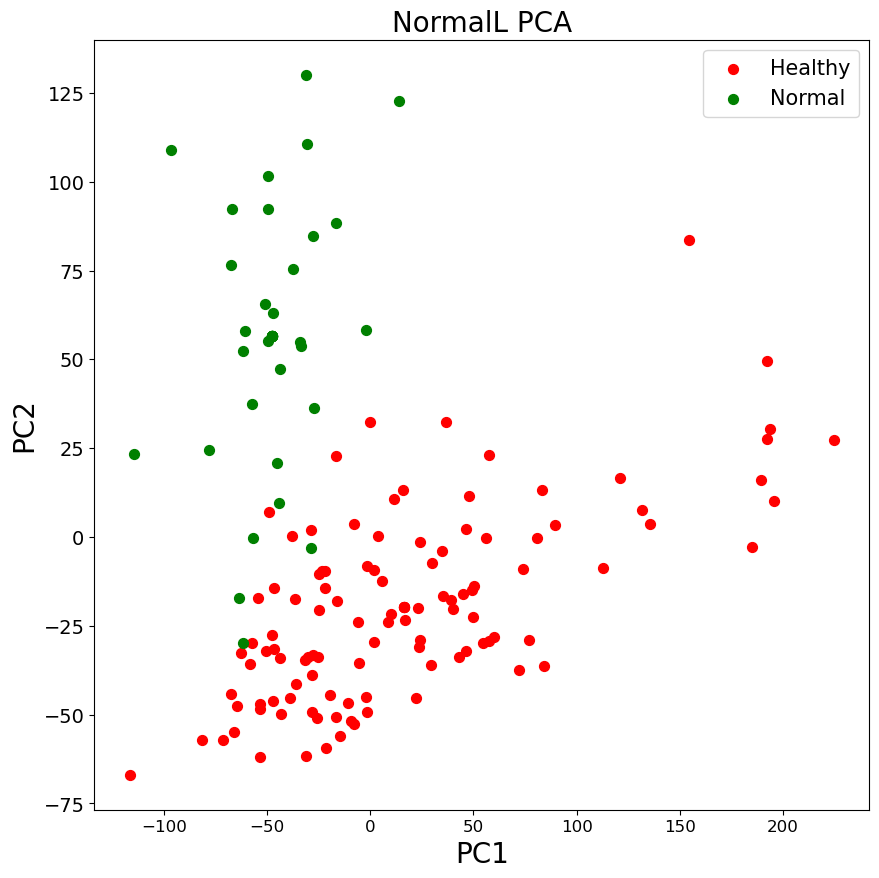

In [5]:
#formatting plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("NormalL PCA",fontsize=20)
targets = ['Healthy', 'Normal']
colours = ['r', 'g']
#colour code points according to pam50
for target, colour in zip(targets,colours):
    index = principal_NormalL_Df.index == target
    plt.scatter(principal_NormalL_Df.loc[index, 'PC1']
               , principal_NormalL_Df.loc[index, 'PC2'], c = colour, s = 50)
#plot legend
plt.legend(targets,prop={'size': 15})

